In [107]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-white')
#plt.style.available
#plt.style.use('seaborn-dark-palette')

### Load the interactions summary from Human Promoter Analysis

In [108]:
#df = pd.read_csv('Human_Promoter_Analysis_euclidean_v8/Interactions_Results/interactions_summary_attnLimit-0.08.txt',sep='\t')

run = 2
numEx = 1000

df = pd.read_csv('Human_Promoter_Analysis_euclidean_v8/Interactions_Results_v9_run'+str(run)+'_'+str(numEx)+'/interactions_summary_attnLimit-0.08.txt',sep='\t')

In [109]:
df.shape

(1069, 12)

In [110]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,228.0,386.0,242.0,2.669928e-41,3.974949e-40
1,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,282.0,168.0,253.0,338.0,8.049162e-14,1.451309e-13
2,filter3<-->filter18,608,M0408_1.02,0.00457,M1007_1.02,0.002963,42.0,330.0,387.0,347.0,5.039890e-21,1.317235e-20
3,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,12.0,42.0,347.0,324.0,3.467012e-29,1.600855e-28
4,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,276.0,156.0,246.0,454.0,1.087588e-07,1.495492e-07


In [111]:
#df = df[(df['motif1_qval'] < 0.01) & (df['motif2_qval']<0.01)]

##### keep significant interactions

In [112]:
df = df[df['adjusted_pval']<0.05]

In [113]:
df.shape

(931, 12)

In [114]:
df = df[(df['motif1_qval'] < 0.05) & (df['motif2_qval']<0.05)]

In [115]:
df.shape

(931, 12)

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [116]:
df_annotate = pd.read_csv('../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [117]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [118]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['TF_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [119]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)

In [120]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

In [121]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,228.0,386.0,242.0,2.669928e-41,3.974949e-40,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1
1,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,282.0,168.0,253.0,338.0,8.049162e-14,1.451309e-13,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
2,filter3<-->filter18,608,M0408_1.02,0.00457,M1007_1.02,0.002963,42.0,330.0,387.0,347.0,5.039890e-21,1.317235e-20,ZKSCAN1,HOXA11,ZKSCAN1$\longleftrightarrow$HOXA11
3,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,12.0,42.0,347.0,324.0,3.467012e-29,1.600855e-28,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1
4,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,276.0,156.0,246.0,454.0,1.087588e-07,1.495492e-07,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2


In [122]:
df = df[df['TF1']!=df['TF2']]

In [123]:
df.shape

(896, 15)

#### Fix redundant interaction pairs
 fix A<->B vs B<->A

In [124]:
df = df.reset_index()

In [125]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,228.0,386.0,242.0,2.669928e-41,3.974949e-40,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1
1,1,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,282.0,168.0,253.0,338.0,8.049162e-14,1.451309e-13,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
2,2,filter3<-->filter18,608,M0408_1.02,0.00457,M1007_1.02,0.002963,42.0,330.0,387.0,347.0,5.039890e-21,1.317235e-20,ZKSCAN1,HOXA11,ZKSCAN1$\longleftrightarrow$HOXA11
3,3,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,12.0,42.0,347.0,324.0,3.467012e-29,1.600855e-28,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1
4,4,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,276.0,156.0,246.0,454.0,1.087588e-07,1.495492e-07,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2


In [126]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1'][i]
    TF2 = df['TF2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [127]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,228.0,386.0,242.0,2.669928e-41,3.974949e-40,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1
1,1,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,282.0,168.0,253.0,338.0,8.049162e-14,1.451309e-13,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
2,2,filter3<-->filter18,608,M0408_1.02,0.00457,M1007_1.02,0.002963,42.0,330.0,387.0,347.0,5.039890e-21,1.317235e-20,ZKSCAN1,HOXA11,ZKSCAN1$\longleftrightarrow$HOXA11
3,3,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,12.0,42.0,347.0,324.0,3.467012e-29,1.600855e-28,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1
4,4,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,276.0,156.0,246.0,454.0,1.087588e-07,1.495492e-07,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
5,5,filter3<-->filter24,614,M0408_1.02,0.00457,M0891_1.02,0.020530,54.0,270.0,229.0,426.0,1.542704e-03,1.784697e-03,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2
6,6,filter3<-->filter33,623,M0408_1.02,0.00457,M0404_1.02,0.013770,6.0,138.0,234.0,320.0,1.204523e-13,2.158386e-13,ZKSCAN1,ZNF202,ZKSCAN1$\longleftrightarrow$ZNF202
7,7,filter3<-->filter37,627,M0408_1.02,0.00457,M4459_1.02,0.004851,138.0,264.0,446.0,426.0,3.222387e-51,1.833308e-49,ZKSCAN1,EGR1,ZKSCAN1$\longleftrightarrow$EGR1
8,8,filter3<-->filter41,631,M0408_1.02,0.00457,M0607_1.02,0.036546,246.0,96.0,331.0,460.0,3.987751e-14,7.310113e-14,ZKSCAN1,KDM2B,ZKSCAN1$\longleftrightarrow$KDM2B
9,9,filter3<-->filter53,643,M0408_1.02,0.00457,M4477_1.02,0.015299,204.0,342.0,171.0,204.0,1.265563e-08,1.805680e-08,ZKSCAN1,SRF,ZKSCAN1$\longleftrightarrow$SRF


In [128]:
df.shape

(896, 16)

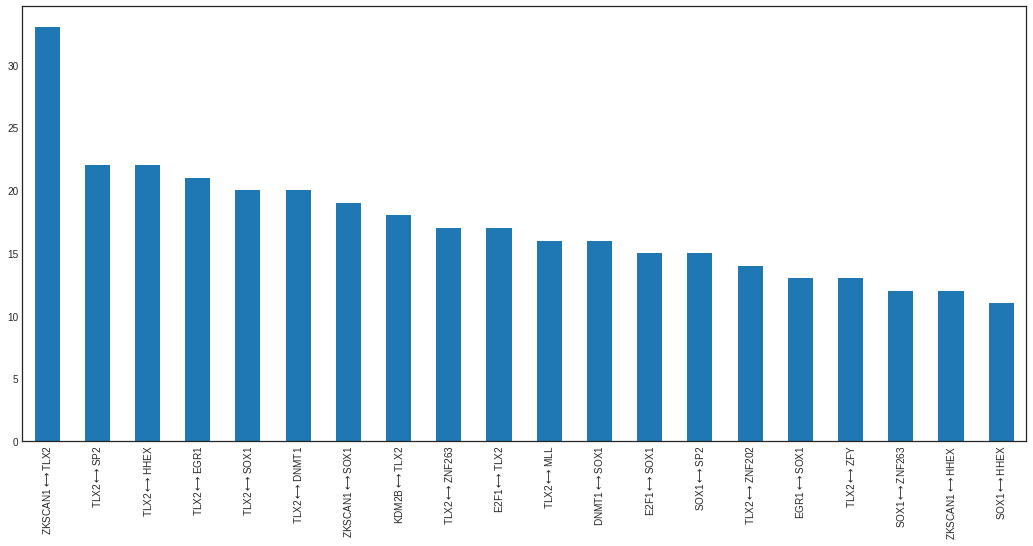

In [129]:
df['TF_interaction'].value_counts()[:20].plot(kind='bar', figsize=(18,8))

### Distribution of mean distance of interaction

Text(0.5, 1.0, 'Distribution of motif interaction distances')

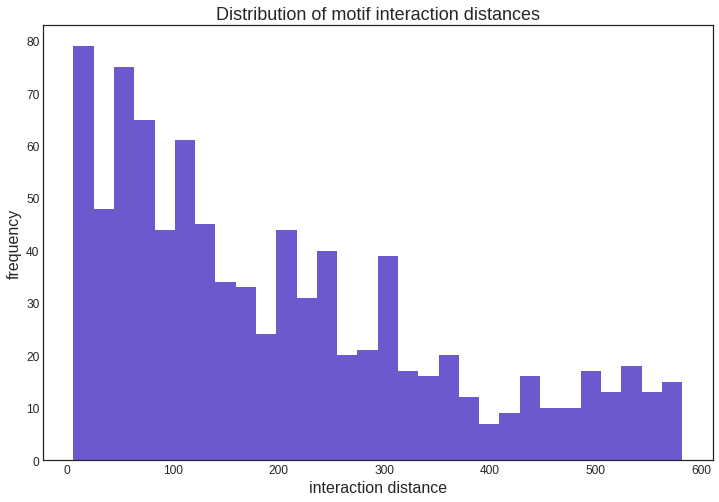

In [130]:
ax = df['mean_distance'].plot(kind='hist',bins=30, figsize=(12,8),color='slateblue',fontsize=12)
ax.set_xlabel("interaction distance",fontsize=16)
ax.set_ylabel("frequency",fontsize=16)
ax.xaxis.set_tick_params(rotation=0)
ax.set_title('Distribution of motif interaction distances',fontsize=18)

In [131]:
df['mean_distance'].mean(),df['mean_distance'].median()

(199.3125, 156.0)

### Most Frequent TF Family Interactions

In [132]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]

In [133]:
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [134]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family
0,0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,228.0,386.0,242.0,2.669928e-41,3.974949e-40,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1,C2H2 ZF,E2F
1,1,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,282.0,168.0,253.0,338.0,8.049162e-14,1.451309e-13,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain
2,2,filter3<-->filter18,608,M0408_1.02,0.00457,M1007_1.02,0.002963,42.0,330.0,387.0,347.0,5.039890e-21,1.317235e-20,ZKSCAN1,HOXA11,ZKSCAN1$\longleftrightarrow$HOXA11,C2H2 ZF,Homeodomain
3,3,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,12.0,42.0,347.0,324.0,3.467012e-29,1.600855e-28,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC
4,4,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,276.0,156.0,246.0,454.0,1.087588e-07,1.495492e-07,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain
5,5,filter3<-->filter24,614,M0408_1.02,0.00457,M0891_1.02,0.020530,54.0,270.0,229.0,426.0,1.542704e-03,1.784697e-03,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain
6,6,filter3<-->filter33,623,M0408_1.02,0.00457,M0404_1.02,0.013770,6.0,138.0,234.0,320.0,1.204523e-13,2.158386e-13,ZKSCAN1,ZNF202,ZKSCAN1$\longleftrightarrow$ZNF202,C2H2 ZF,C2H2 ZF
7,7,filter3<-->filter37,627,M0408_1.02,0.00457,M4459_1.02,0.004851,138.0,264.0,446.0,426.0,3.222387e-51,1.833308e-49,ZKSCAN1,EGR1,ZKSCAN1$\longleftrightarrow$EGR1,C2H2 ZF,C2H2 ZF
8,8,filter3<-->filter41,631,M0408_1.02,0.00457,M0607_1.02,0.036546,246.0,96.0,331.0,460.0,3.987751e-14,7.310113e-14,ZKSCAN1,KDM2B,ZKSCAN1$\longleftrightarrow$KDM2B,C2H2 ZF,CxxC
9,9,filter3<-->filter53,643,M0408_1.02,0.00457,M4477_1.02,0.015299,204.0,342.0,171.0,204.0,1.265563e-08,1.805680e-08,ZKSCAN1,SRF,ZKSCAN1$\longleftrightarrow$SRF,C2H2 ZF,MADS box


In [135]:
df.shape

(896, 18)

In [136]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [137]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1_Family'][i]
    TF2 = df['TF2_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [138]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,228.0,386.0,242.0,2.669928e-41,3.974949e-40,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1,C2H2 ZF,E2F,C2H2 ZF$\longleftrightarrow$E2F
1,1,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,282.0,168.0,253.0,338.0,8.049162e-14,1.451309e-13,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain
2,2,filter3<-->filter18,608,M0408_1.02,0.00457,M1007_1.02,0.002963,42.0,330.0,387.0,347.0,5.039890e-21,1.317235e-20,ZKSCAN1,HOXA11,ZKSCAN1$\longleftrightarrow$HOXA11,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain
3,3,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,12.0,42.0,347.0,324.0,3.467012e-29,1.600855e-28,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC
4,4,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,276.0,156.0,246.0,454.0,1.087588e-07,1.495492e-07,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain


In [139]:
#df.to_csv('Human-promoter_all_significant_TFs.csv')

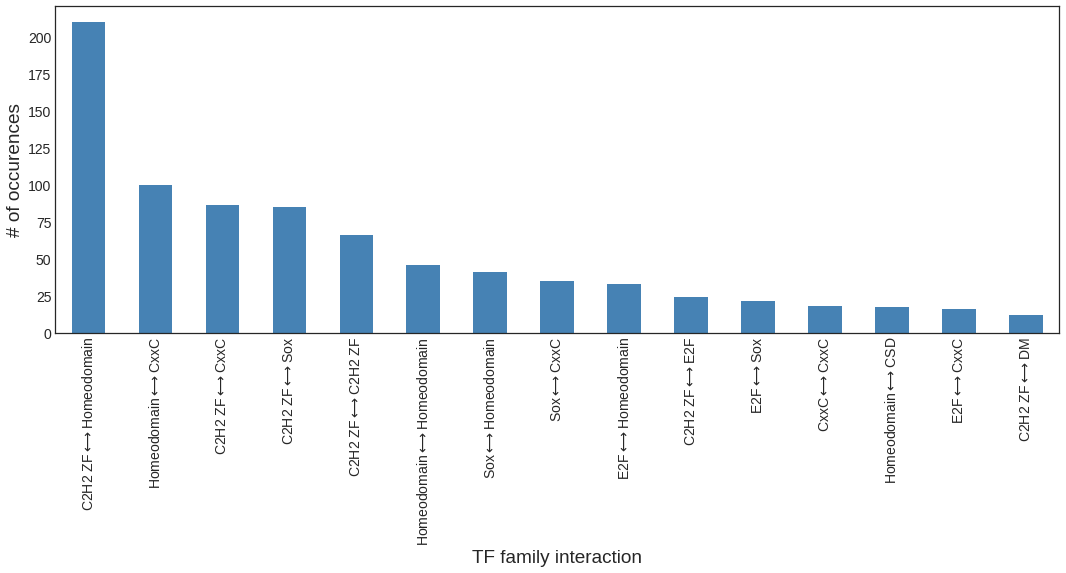

In [140]:
ax = df['Family_Interaction'].value_counts()[:15].plot(kind='bar',color='steelblue',figsize=(18,6),fontsize=14)
ax.set_xlabel("TF family interaction",fontsize=19)
ax.set_ylabel("# of occurences",fontsize=19)
ax.xaxis.set_tick_params(rotation=90)
#ax.set_title('Top interacting families of transcription factors',fontsize=18)
plt.savefig('Family_interactions_Human.pdf',bbox_inches='tight')

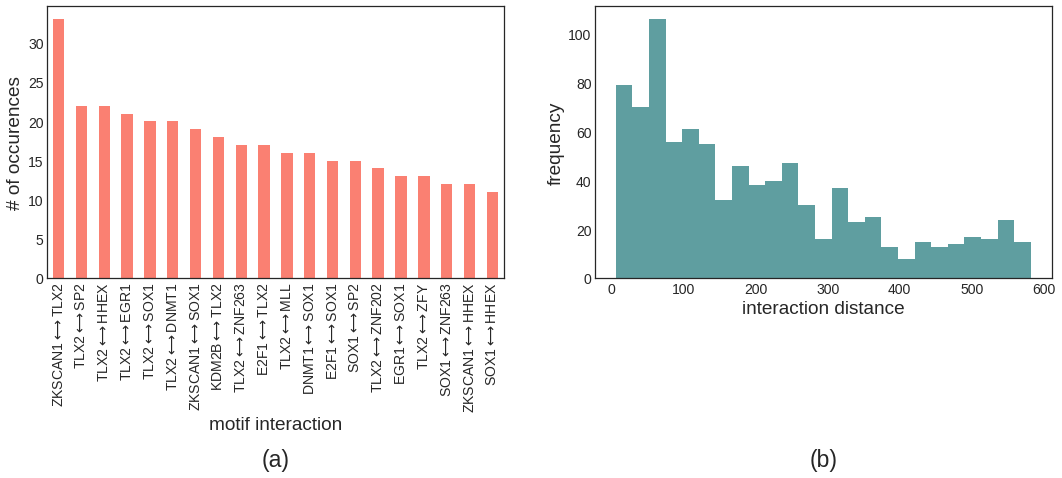

In [141]:
fig, axes = plt.subplots(1, 2)
ax1 = df['TF_interaction'].value_counts()[:20].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=14,ax=axes[0])
ax1.set_xlabel("motif interaction",fontsize=19)
ax1.set_ylabel("# of occurences",fontsize=19)
ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Most frequent interactions',fontsize=16)

ax2 = df['mean_distance'].plot(kind='hist',bins=25, figsize=(18,5),color='cadetblue',fontsize=14,ax=axes[1])
ax2.set_xlabel("interaction distance",fontsize=19)
ax2.set_ylabel("frequency",fontsize=19)
ax2.xaxis.set_tick_params(rotation=0)
#ax2.set_title('Distribution of motif interaction distances',fontsize=16)

ax1.text(0.5,-0.69, "(a)", size=23, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.69, "(b)", size=23, ha="center", 
         transform=ax2.transAxes)
#df_list[count].plot(ax=axes[1,1])
plt.savefig('Main_Human.pdf',bbox_inches='tight')

In [142]:
len(df['TF_interaction'].value_counts()),np.median(df['TF_interaction'].value_counts())

(234, 2.0)

In [143]:
df['motifsOnlyInt'] = df['TF1']+':'+df['TF2']
df['familyOnlyInt'] = df['TF1_Family']+':'+df['TF2_Family']
df.to_csv('Attn_Human-Promoter_Final.txt',sep='\t')

In [144]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt
0,0,filter3<-->filter4,594,M0408_1.02,0.00457,M4536_1.02,0.000552,126.0,228.0,386.0,...,2.669928e-41,3.974949e-40,ZKSCAN1,E2F1,ZKSCAN1$\longleftrightarrow$E2F1,C2H2 ZF,E2F,C2H2 ZF$\longleftrightarrow$E2F,ZKSCAN1:E2F1,C2H2 ZF:E2F
1,1,filter3<-->filter12,602,M0408_1.02,0.00457,M0891_1.02,0.000487,282.0,168.0,253.0,...,8.049162e-14,1.451309e-13,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain,ZKSCAN1:TLX2,C2H2 ZF:Homeodomain
2,2,filter3<-->filter18,608,M0408_1.02,0.00457,M1007_1.02,0.002963,42.0,330.0,387.0,...,5.039890e-21,1.317235e-20,ZKSCAN1,HOXA11,ZKSCAN1$\longleftrightarrow$HOXA11,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain,ZKSCAN1:HOXA11,C2H2 ZF:Homeodomain
3,3,filter3<-->filter21,611,M0408_1.02,0.00457,M0609_1.02,0.009532,12.0,42.0,347.0,...,3.467012e-29,1.600855e-28,ZKSCAN1,DNMT1,ZKSCAN1$\longleftrightarrow$DNMT1,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC,ZKSCAN1:DNMT1,C2H2 ZF:CxxC
4,4,filter3<-->filter23,613,M0408_1.02,0.00457,M0891_1.02,0.020195,276.0,156.0,246.0,...,1.087588e-07,1.495492e-07,ZKSCAN1,TLX2,ZKSCAN1$\longleftrightarrow$TLX2,C2H2 ZF,Homeodomain,C2H2 ZF$\longleftrightarrow$Homeodomain,ZKSCAN1:TLX2,C2H2 ZF:Homeodomain


### Annotate Interactions using TRUSTv2 (and other sources)

In [145]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

    
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/mouse_co-regulate_dict.pckl','rb') as f:
    mouse_dict = pickle.load(f)  

In [146]:
def annotate_interaction(x, intr_dict = None):
    TFs_A,TFs_B = x.split(r'$\longleftrightarrow$')
    TFs_A = TFs_A.split(',')
    TFs_B = TFs_B.split(',')
    
    for TF_A in TFs_A:
        if TF_A not in intr_dict:
            continue
        for TF_B in TFs_B:
            if TF_B not in intr_dict:
                continue
            TF_A_targets = intr_dict[TF_A][:,0]
            TF_B_targets = intr_dict[TF_B][:,0]
            if len(set.intersection(set(TF_A_targets),set(TF_B_targets))) != 0:
                return 1 #interaction found (the two TFs have shared targets)
            
    
    return 0

In [147]:
df['Interaction_in_TRUSTv2'] = df['TF_interaction'].apply(annotate_interaction, intr_dict = human_dict)

In [148]:
df['Interaction_in_TRUSTv2'].value_counts()

0    876
1     20
Name: Interaction_in_TRUSTv2, dtype: int64

In [149]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1][df.columns[[0,1,3,4,5,6,7,8,12,13,14,15,16,17,18]]]

In [150]:
df_resTRUSTv2[['TF_interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_interaction')

,TF_interaction,TF1_Family,TF2_Family,adjusted_pval
389,EGR1$\longleftrightarrow$E2F4,C2H2 ZF,E2F,1.812025e-49
56,E2F1$\longleftrightarrow$EGR1,E2F,C2H2 ZF,4.000919e-49
247,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,1.787215e-48
91,E2F1$\longleftrightarrow$E2F4,E2F,E2F,1.386751e-40
46,E2F1$\longleftrightarrow$DNMT1,E2F,CxxC,1.705695e-39
446,SRF$\longleftrightarrow$SP2,MADS box,C2H2 ZF,1.924034e-33
248,DNMT1$\longleftrightarrow$E2F4,CxxC,E2F,1.028883e-29
366,EGR1$\longleftrightarrow$SRF,C2H2 ZF,MADS box,2.643883e-28
98,E2F1$\longleftrightarrow$LCOR,E2F,Pipsqueak,1.135945e-23
395,EGR1$\longleftrightarrow$LCOR,C2H2 ZF,Pipsqueak,1.610013e-23


In [151]:
dfx = df[['filter_interaction','TF_interaction','Family_Interaction','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_interaction')
dfx.to_csv('ATTN_TF_unique_interactions_Human.csv',index=None)